# A Study of the Correlation between Google Search Trends and Mobility Data in Singapore

### I. Problem Statement / Research Topic
--------------------------------------------------------------------------------------------------------------------------------------------
#### What research topic are you going to address?
Thesis: If Google keyword searches can predict actual data. For this project, we will use Google Trend searches and compare it with actual mobility data.

Our focus will be on studying the correlation between <b><u>shopping mobility data</u></b> and <b><u>shopping-related Google search queries</u></b>.

<b><u>Methodology:</u></b>
<br>
(1) Selecting keyword searches and see which keyword searches correlate strongly with actual data
<br>
(2) Use the highly correlated keyword searches as coefficients for our model (Multi Variate Regression)

--------------------------------------------------------------------------------------------------------------------------------------------

#### Why are you interested to research on this topic in this region/country?
As Singapore residents, we have the benefit of having experienced the local COVID-19 situation for ourselves. It would hence be more interesting for us to delve deeper into the data's implications about our own experiences, rather than study a region from which we are far removed. We would also be more likely to know the general shopping trends of Singapore residents, which can help us focus our study.

Furthermore, Singapore has a very high smartphone penetration rate, and its residents are, on average, technologically literate. Therefore, both the Community Mobility Data, which Google had extracted by tapping into the Location Services of mobile phones signed into Google Accounts, and the Google Search Query trend data should be quite accurate and representative of the general population.

--------------------------------------------------------------------------------------------------------------------------------------------

#### Why is this topic interesting to you or why are you passionate to research on this topic?
As traditional methods of data collection requires heavy resources such as time and materials, there has been a global shift towards online data collection. Google Trends is one of them. Furthermore, with the rise of technology usage and the Internet being a useful go-to resource, internet-derived information has been recognised as one of the most accurate sources of data collection.

Hence, our project stands to test against this hypothesis that the Internet is an accurate source of data collection, using Google Trends as our parameter. 

### II. Dataset and Data Preparation
--------------------------------------------------------------------------------------------------------------------------------------------
#### Please provide the name and URL of the data portal and the name and URL of the source dataset(s) that you intend to research on. 

a. 
<br>Name: Covid Mobility Reports
<br>URL: https://www.google.com/covid19/mobility/

b. 
<br>Name: Google Query Trends
<br>URL: https://trends.google.com/trends/?geo=US

Note: We only focus on Singapore's data

--------------------------------------------------------------------------------------------------------------------------------------------

#### Also, where necessary, explain what datasets have you tried and why did you reject them in favour of your selected dataset?

a. N/A. Our hypothesis was that query trends would predict offline mobility behaviour for e.g. a surge in queries related to offline shopping would predict a surge in traffic in retail areas

b. and so these datasets were sufficient to answer to our hypothesis

--------------------------------------------------------------------------------------------------------------------------------------------

#### Please also provide the structure of the original dataset. What is the range of values (years, categories etc.) covered? How is it provided to you (CSV, Excel etc.)? In a short paragraph, what is this dataset about?

a. 
<br>Name: Covid Mobility Reports - this data shows the % change in footfall traffic for various categories of places e.g. retail, groceries, workplaces over time
<br>Provided Format: csv
<br>Date Range: daily from 15 Feb 2020 to 27 Sep 2020 (however data from 17 August onwards is NaN)
<br>Category Range: 

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
<br>       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
<br>       'retail_and_recreation_percent_change_from_baseline',
<br>       'grocery_and_pharmacy_percent_change_from_baseline',
<br>       'parks_percent_change_from_baseline',
<br>       'transit_stations_percent_change_from_baseline',
<br>       'workplaces_percent_change_from_baseline',
<br>       'residential_percent_change_from_baseline'],
<br>      dtype='object')

b. 
<br>Name: Google Query Trends - this data shows query trends for specific keywords over time
<br>Provided Format: could be csv or API-ed directly from pytrends (see e.g. below)
<br>Date Range: Daily from 1 Jan 2020 to 18 Oct 2020 (We will only be using 15 Feb 2020 to 27 Sep 2020)
<br>Category Range: 
Selected Keywords - The team will brainstorm a set of keywords for each category. We will also leverage pytrends correlated keywords:

related_queries = pytrend.related_queries()
<br>related_queries.values()

--------------------------------------------------------------------------------------------------------------------------------------------

### Selecting Google Query Trends
--------------------------------------------------------------------------------------------------------------------------------------------
We will be focusing on the areas "retail and recreation" and "pharmacy and grocery", as they are the most relevant part of the Mobility Data to shopping. Hence, we want data on queries related to these areas.

We compiled a list of the relevant Topics (as classified by Google Trends). For each Topic, we then took the top 5 related search queries by volume. An example is shown below:

<u>Topic - Shopping Mall</u>:
1. mall
2. singapore mall
3. singapura plaza
4. shopping mall
5. city square

And the list of topics are as follows:
- Online Shopping
- Grocery Store
- Online Grocer
- Recreation
- Shopping Mall
- Pharmacy
- Supermarket

The Topics "Online Pharmacy" and "Retail" were also explored, but ultimately excluded due to the former having only one related query ("nuh pharmacy online"), and the latter's related queries generally consisting of job seeker queries.

We then compiled a list of Queries that we could use as data:

<b>Retail and Recreation</b>:
1. mall
2. singapore mall
3. singapura plaza
4. shopping mall
5. city square
6. recreation
7. recreational

(We can throw in online shopping terms and compare whether that makes the error less or more, since online shopping should have an inverse correlation with physical shopping)

8. online shopping
9. shop online
10. online shopping singapore
11. popular
12. best online shopping
13. wish shopping

("recreational activities", "terusan recreation centre" and "west coast recreation centre" are left out because it appears that despite being in the top 10 search queries, their numbers are not high and at a glance there are many weeks in which there are no searches. To prevent this from impacting the model, they are left out.)

<b>Groceries and Pharmacy</b>:
1. supermarket
2. singapore supermarket
3. ntuc
4. supermarket near me
5. supermarket in singapore
6. pharmacy
7. pharmacy singapore
8. guardian
9. guardian pharmacy
10. pharmacy near me

(These are the possible online shopping terms)
11. online grocery
12. singapore online grocery
13. indian grocery online
14. ntuc online grocery
15. ntuc online


### III. Methodology
--------------------------------------------------------------------------------------------------------------------------------------------
We first have to clean the Covid Mobility Report dataset. Using pandas, we extract the data into a Pandas Dataframe.

In [2]:
import pandas as pd

df_1 = pd.read_csv('Data/sg_mobility_data.csv')

df_1.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,SG,Singapore,NaN,NaN,NaN,NaN,NaN,2020-02-15,-14.0,-9.0,-10.0,-17.0,-4,8
1,SG,Singapore,NaN,NaN,NaN,NaN,NaN,2020-02-16,-19.0,-17.0,-18.0,-22.0,-7,8
2,SG,Singapore,NaN,NaN,NaN,NaN,NaN,2020-02-17,-12.0,-6.0,-7.0,-14.0,-4,7
3,SG,Singapore,NaN,NaN,NaN,NaN,NaN,2020-02-18,-13.0,-9.0,-7.0,-15.0,-5,7
4,SG,Singapore,NaN,NaN,NaN,NaN,NaN,2020-02-19,-14.0,-14.0,-6.0,-15.0,-5,8


In [3]:
print(df_1['date'].head(1))
print(df_1['date'].tail(1))

0    2020-02-15
Name: date, dtype: object
225    2020-09-27
Name: date, dtype: object


The dataset contains the country region and region code, as well as the percentage change of mobility from the baseline for six key areas:
- retail and recreation
- grocery and pharmacy
- parks
- transit stations
- workplaces
- residential areas

We also know that the dataset spans from **<u>15 February 2020 to 27 September 2020</u>**. This timeframe includes periods before and after the circuit breaker measures on 3 April.

However, the dataset also includes numerous null values in columns that were supposed to contain geographical data. We confirm this below:

In [4]:
print(len(df_1))
print(df_1.isnull().sum())

226
country_region_code                                     0
country_region                                          0
sub_region_1                                          226
sub_region_2                                          226
metro_area                                            226
iso_3166_2_code                                       226
census_fips_code                                      226
date                                                    0
retail_and_recreation_percent_change_from_baseline     42
grocery_and_pharmacy_percent_change_from_baseline      42
parks_percent_change_from_baseline                     42
transit_stations_percent_change_from_baseline          42
workplaces_percent_change_from_baseline                 0
residential_percent_change_from_baseline                0
dtype: int64


As can be seen, the dataset has 226 entries in total. The "sub_region_1", "sub_regioin_2", "metro_area", "iso_3166__2_code" and "census_fips_code" columns have 226 null entries - meaning that they are completely empty. They are not critical to our study, hence we can drop them. We also do not need the country region and country region code columns.

In [5]:
columns = list(df_1.columns)

df_1 = df_1[columns[7:]]
df_1.head()

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,-14.0,-9.0,-10.0,-17.0,-4,8
1,2020-02-16,-19.0,-17.0,-18.0,-22.0,-7,8
2,2020-02-17,-12.0,-6.0,-7.0,-14.0,-4,7
3,2020-02-18,-13.0,-9.0,-7.0,-15.0,-5,7
4,2020-02-19,-14.0,-14.0,-6.0,-15.0,-5,8


From our null value analysis above, we can see that the "retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "parks_percent_change_from_baseline" and "transit_stations_percent_change_from_baseline" also have null values. This may be due to the values not beeing updated after a certain date.

We confirm this below:

In [6]:
df_1.iloc[182:225,:]

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
182,2020-08-15,-17.0,4.0,-13.0,-27.0,-8,13
183,2020-08-16,-22.0,-4.0,-6.0,-34.0,-6,13
184,2020-08-17,NaN,NaN,NaN,NaN,-30,19
185,2020-08-18,NaN,NaN,NaN,NaN,-28,18
186,2020-08-19,NaN,NaN,NaN,NaN,-28,20
187,2020-08-20,NaN,NaN,NaN,NaN,-29,19
188,2020-08-21,NaN,NaN,NaN,NaN,-25,20
189,2020-08-22,NaN,NaN,NaN,NaN,-7,12
190,2020-08-23,NaN,NaN,NaN,NaN,-6,13
191,2020-08-24,NaN,NaN,NaN,NaN,-28,19


Our study focuses on mobility data related to <b><u>shopping</u></b>. Hence, we will create a new Dataframe with only the "date", "retail_and_recreation_percent_change_from_baseline" and "grocery_and_pharmacy_percent_change_from_baseline" columns.

From there, we will <b>drop rows with null entries</b> as the data is no longer updated after 16 August 2020. We will not try to fill in the null entries with other values as this would be extrapolating the data, which would impact the reliability of the dataset.

In [7]:
columns = list(df_1.columns)

shopping_df = df_1[columns[:3]].copy()
shopping_df.dropna(axis=0, inplace=True)

print("Length: ", len(shopping_df))
print("NA: ", shopping_df.isnull().sum())

shopping_df.head()

Length:  184
NA:  date                                                  0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
dtype: int64


,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline
0,2020-02-15,-14.0,-9.0
1,2020-02-16,-19.0,-17.0
2,2020-02-17,-12.0,-6.0
3,2020-02-18,-13.0,-9.0
4,2020-02-19,-14.0,-14.0


We then look at the overview of the data and visualize it using the Seaborn library.

In [8]:
shopping_df.describe()[['retail_and_recreation_percent_change_from_baseline',
                 'grocery_and_pharmacy_percent_change_from_baseline']]

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline
count,184.000000,184.000000
mean,-37.320652,-9.880435
std,21.303695,9.683903
min,-70.000000,-35.000000
25%,-61.000000,-17.000000
50%,-29.500000,-9.000000
75%,-18.750000,-4.000000
max,-8.000000,18.000000


In [9]:
%matplotlib inline

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
vars_1 = ['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline']

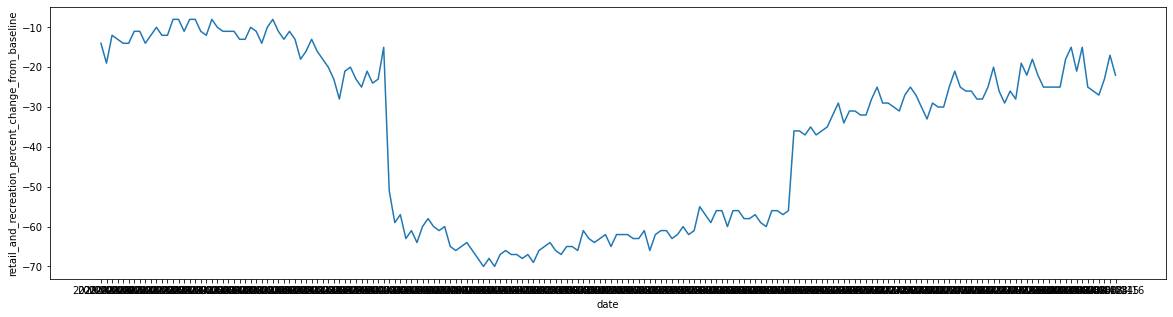

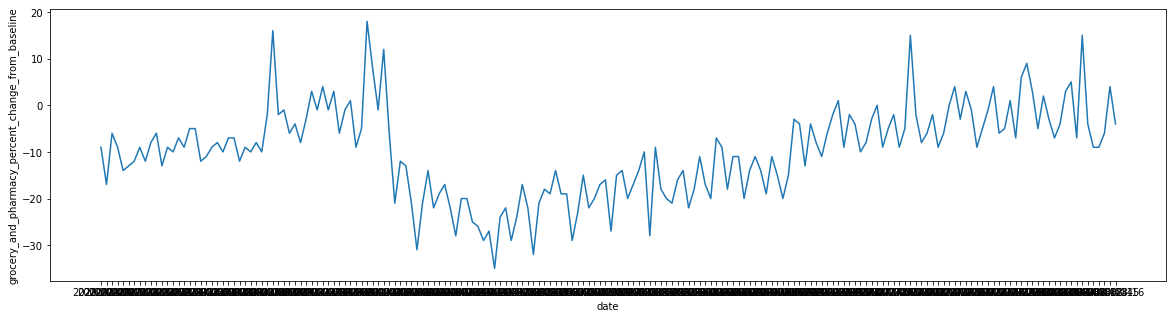

In [12]:
for i in vars_1:
  plt.figure(figsize = (20,5))
  sns.lineplot(data = df_1, x = 'date', y = i)

We then move on to the Google Trend data. We first download and open the data for the search query "mall", to check the dataset.

In [13]:
df_2 = pd.read_csv("Data/multiTimeline.csv", skiprows=2)

column = list(df_2.columns)[1]
rename_dict = {column:column[:-13]}

df_2 = df_2.rename(columns=rename_dict)

print(df_2.shape)
df_2.head()

(184, 2)


,Day,mall
0,2020-02-15,65
1,2020-02-16,71
2,2020-02-17,54
3,2020-02-18,59
4,2020-02-19,51


We then need to add the column to the shopping dataframe.

In [14]:
column = list(df_2.columns)[1]
shopping_df[column] = df_2.iloc[:,1:2]

shopping_df.head()

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,mall
0,2020-02-15,-14.0,-9.0,65
1,2020-02-16,-19.0,-17.0,71
2,2020-02-17,-12.0,-6.0,54
3,2020-02-18,-13.0,-9.0,59
4,2020-02-19,-14.0,-14.0,51


Now that we have established how we will treat the Google Trends data, we can go ahead and add the rest of our data.

Many of the queries are related and hence should not be treated as separate variables. For example, "guardian" and "guardian pharmacy" mean the same thing. Ideally, we should add the data of such queries together.

However, Google Trends does not release the absolute data of queries, but rather presents each week as a percentage of the highest activity within a given period. This causes each queries' data to be relative to itself, and hence is not suitable for combining with other queries' data.

In [15]:
for i in range(27):
    # Reading data into Dataframe
    df_2 = pd.read_csv("Data/multiTimeline (" + str(i + 1) +").csv", skiprows=2)

    column = list(df_2.columns)[1]
    rename_dict = {column:column[:-13]}

    df_2 = df_2.rename(columns=rename_dict)

    # Adding to the main Dataframe
    column = list(df_2.columns)[1]
    shopping_df[column] = df_2.iloc[:,1:2]

shopping_df.head()

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,mall,singapore mall,singapura plaza,shopping mall,city square,recreation,recreational,...,pharmacy,pharmacy singapore,guardian,guardian pharmacy,pharmacy near me,online grocery,singapore online grocery,indian grocery online,ntuc online grocery,ntuc online
0,2020-02-15,-14.0,-9.0,65,46,42,56,99,47,0,...,91,35,84,20,38,13,32,43,41,24
1,2020-02-16,-19.0,-17.0,71,65,53,87,80,24,31,...,39,18,91,79,0,0,16,0,0,35
2,2020-02-17,-12.0,-6.0,54,38,37,39,54,32,27,...,77,31,94,17,67,11,0,0,0,33
3,2020-02-18,-13.0,-9.0,59,57,32,33,27,21,27,...,57,39,49,43,0,11,0,0,0,19
4,2020-02-19,-14.0,-14.0,51,41,42,22,16,42,0,...,72,39,61,17,50,11,0,0,0,23


We can see that despite us having visually weeded out queries that obviously have a lot of "zero" entries, there are still some columns that seem to have a lot of zeroes. We confirm this below:

In [16]:
print(len(shopping_df))
(shopping_df == 0).sum(axis=0)

184


date                                                    0
retail_and_recreation_percent_change_from_baseline      0
grocery_and_pharmacy_percent_change_from_baseline       2
mall                                                    0
singapore mall                                          0
singapura plaza                                         3
shopping mall                                           0
city square                                             5
recreation                                             26
recreational                                           98
online shopping                                         0
shop online                                             4
online shopping singapore                               5
popular                                                 0
best online shopping                                  139
wish shopping                                         151
supermarket                                             0
singapore supe

A high number of zero entries mean that the search term is not popular, and will be unlikely to give insight into actual mobility data. We should drop any columns that are more than 50% zeroes, as follows:

In [17]:
shopping_df = shopping_df.loc[:, (shopping_df == 0).sum(axis=0) < len(shopping_df) / 2]

(shopping_df == 0).sum(axis=0)

date                                                   0
retail_and_recreation_percent_change_from_baseline     0
grocery_and_pharmacy_percent_change_from_baseline      2
mall                                                   0
singapore mall                                         0
singapura plaza                                        3
shopping mall                                          0
city square                                            5
recreation                                            26
online shopping                                        0
shop online                                            4
online shopping singapore                              5
popular                                                0
supermarket                                            0
singapore supermarket                                  4
ntuc                                                   0
supermarket near me                                   84
supermarket in singapore       

### Correlation Matrix
-----------------------------------------------------------------------------------------------------------------------------
We run a correlation table to see the relationship between the Google Trends data and mobility data, Retail and Recreation change, and Grocery and Pharmacy change.

Searches for the words 'mall', 'singapura plaza' have the highest correlation to Retail and Recreation change.

Other searches such as 'online shopping', 'shop online' are negatively correlated to Retail and Recreation change. This confirms our suspicions of how the Google search queries are correlated to mobility data.

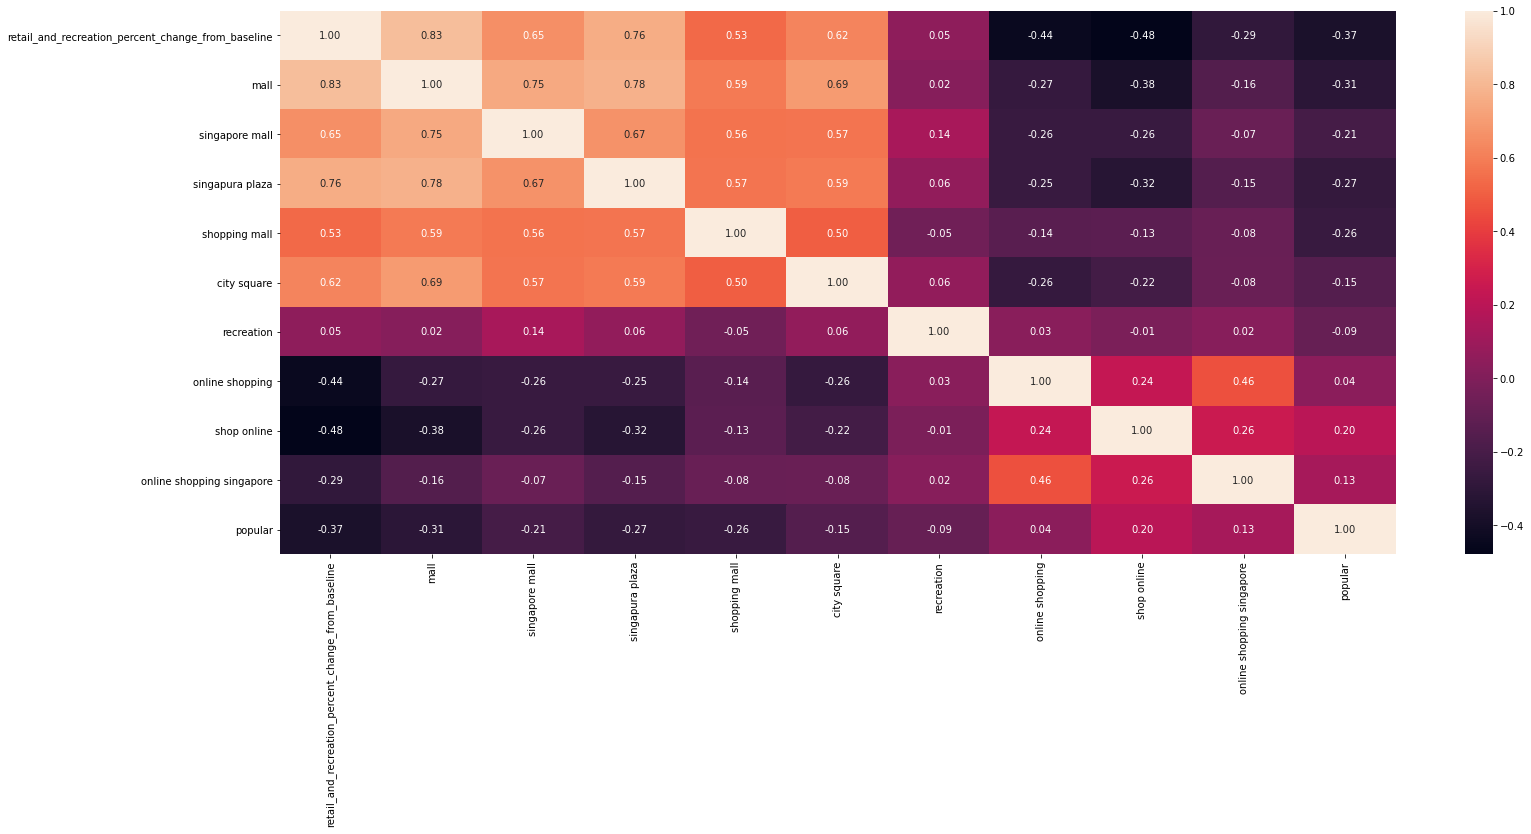

In [18]:
rnr_columns = ["retail_and_recreation_percent_change_from_baseline", "mall", "singapore mall", "singapura plaza",
               "shopping mall", "city square", "recreation", "online shopping", "shop online", "online shopping singapore",
               "popular"]

fig, axes = plt.subplots(figsize=(25, 10))
sns.heatmap(shopping_df[rnr_columns].corr(), ax=axes, annot=True, fmt='.2f')

However, we cannot see a similar pattern for the Grocery and Pharmacy data. Things are not looking so good for our future model!

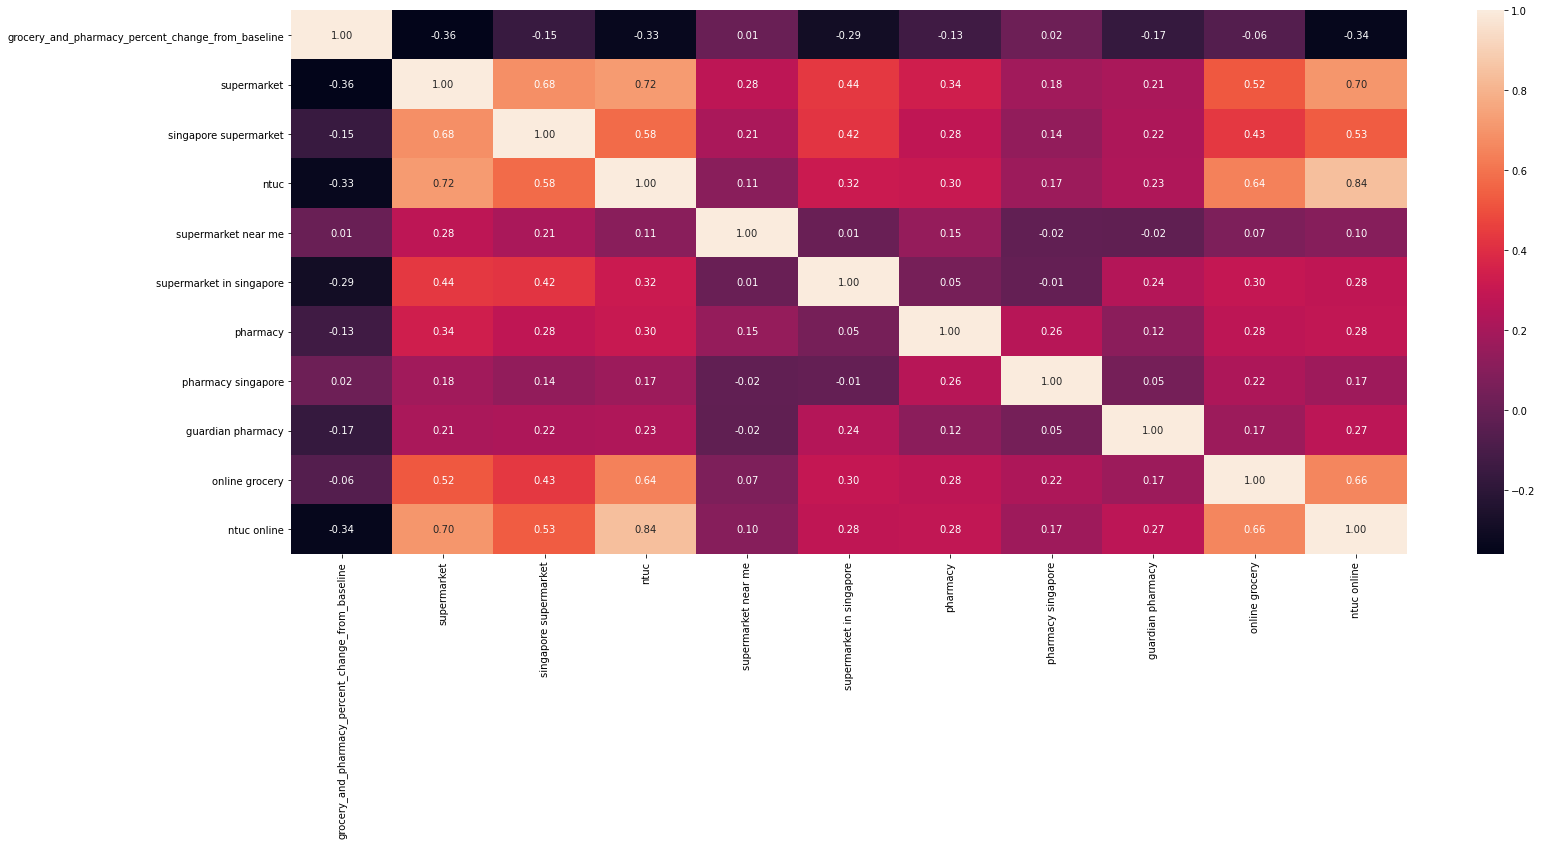

In [20]:
gnp_columns = ["grocery_and_pharmacy_percent_change_from_baseline", "supermarket", "singapore supermarket", "ntuc",
               "supermarket near me", "supermarket in singapore", "pharmacy", "pharmacy singapore", "guardian pharmacy",
               "online grocery", "ntuc online"]

fig, axes = plt.subplots(figsize=(25, 10))
sns.heatmap(shopping_df[gnp_columns].corr(), ax=axes, annot=True, fmt='.2f')

### Multi-variate Regression
-----------------------------------------------------------------------------------------------------------------------------
We can now begin feeding the data into a Regression model. We will create two models first: one for retail and recreation, and another for grocery and pharmacy. For now, we will only include terms related to offline shopping, leaving out online shopping-related terms.

We wrap the model in a <i>ShoppingModel</i> class to make everything easier and neater:

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Both x and y keys must be a list even though y_keys contains just one element!
def TrainLinearModel(data, x_keys, y_key):
    x = data[x_keys]
    y = data[y_key]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=13)
    
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    
    return regr, x_test, y_test



class ShoppingModel:
    def __init__(self, data, x_keys, y_key):
        self.regr, self.x_test, self.y_test = TrainLinearModel(data, x_keys, y_key)
        
    def get_r2_score(self):
        predicted_val = self.regr.predict(self.x_test)
        return r2_score(self.y_test, predicted_val)
    
    def predict(self, data):
        return self.regr.predict(data)

In [22]:
# Storing which columns to use for x and y variables in each model.
# x_alt includes the online shopping-related terms, x does not.
rnr_keys = {"x":["mall", "singapore mall", "singapura plaza", "shopping mall", "city square", "recreation"],
            "x_alt":["mall", "singapore mall", "singapura plaza", "shopping mall", "city square", "recreation",
                     "online shopping", "shop online", "online shopping singapore", "popular"],
            "y":["retail_and_recreation_percent_change_from_baseline"]}


gnp_keys = {"x":["supermarket", "singapore supermarket", "ntuc", "supermarket near me", "supermarket in singapore",
                 "pharmacy","pharmacy singapore", "guardian pharmacy"],
            "x_alt":["supermarket", "singapore supermarket", "ntuc", "supermarket near me", "supermarket in singapore",
                     "pharmacy", "pharmacy singapore", "guardian pharmacy", "online grocery", "ntuc online"],
            "y":["grocery_and_pharmacy_percent_change_from_baseline"]}

In [23]:
rnr_model = ShoppingModel(shopping_df, rnr_keys["x"], rnr_keys["y"])
gnp_model = ShoppingModel(shopping_df, gnp_keys["x"], gnp_keys["y"])

We then evaluate the performance of each model.

In [24]:
print("Retail and Recreation Model Score:", rnr_model.get_r2_score())
print("Grocery and Pharmacy Model Score:", gnp_model.get_r2_score())

Retail and Recreation Model Score: 0.7887157723396261
Grocery and Pharmacy Model Score: 0.13404931041411638


As we can see, the r2 score for the Retail and Recreation model is quite good at <b>0.7887</b>, but the score of the Grocery and Pharmacy Model is much lower at <b>0.1341</b>. We can conclude that our Retail and Recreation Model performed much better than out Grocery and Pharmacy Model.

Next we try including terms <i>related to online shopping</i> when training the model. We should expect an improvement in the model, since there should be a negative correlation between online shopping and travelling to shop (which would show up in the mobility data).

In [25]:
rnr_model_w_online = ShoppingModel(shopping_df, rnr_keys["x_alt"], rnr_keys["y"])
gnp_model_w_online = ShoppingModel(shopping_df, gnp_keys["x_alt"], gnp_keys["y"])

print("Retail and Recreation Model (with Online) Score:", rnr_model_w_online.get_r2_score())
print("Grocery and Pharmacy Model (with Online) Score:", gnp_model_w_online.get_r2_score())

Retail and Recreation Model (with Online) Score: 0.8293117595551914
Grocery and Pharmacy Model (with Online) Score: 0.28069693725883205


As can be seen, both models benefit from the online shopping terms being included in the Multi-Variate Regression.

### Learning Curve (Retail & Recreation Model)
Next, we plot the learning curve to see how our training went.

In [26]:
X = shopping_df[["mall", "singapore mall", "singapura plaza", "shopping mall", "city square", "recreation",
                     "online shopping", "shop online", "online shopping singapore", "popular"]]
y = shopping_df[["retail_and_recreation_percent_change_from_baseline"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, X_test.shape)

(138, 10) (46, 10)


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Z_train = scaler.fit_transform(X_train)
Z_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve

estimator = SGDRegressor(random_state=42, tol=1e-3, max_iter=1000)

# We compare the performance with different training data sizes
train_sizes=[0.01, 0.05, 0.10, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

sample_sizes, train_scores, val_scores = learning_curve(estimator, Z_train, y_train, cv=3,
                                                        train_sizes=train_sizes,
                                                        verbose=1, random_state=42)


[learning_curve] Training set sizes: [ 1  4  9 18 27 36 46 55 64 73 82 92]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\jxion\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jxion\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\jxion\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jxion\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for e

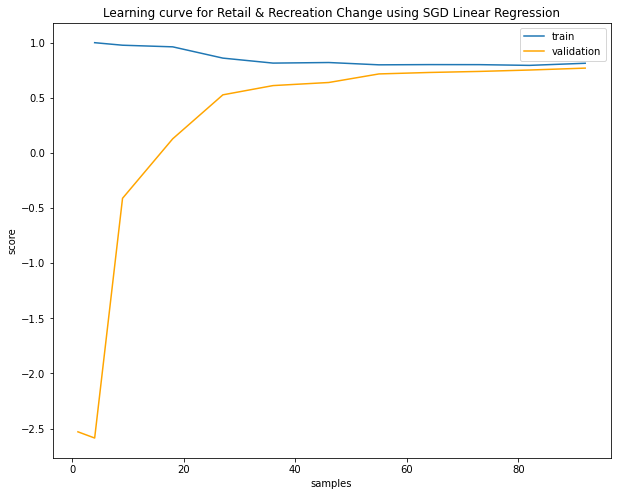

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(sample_sizes, train_scores.mean(axis=1), label='train')
ax.plot(sample_sizes, val_scores.mean(axis=1), color='orange', label='validation')
ax.set(xlabel='samples', ylabel='score', title='Learning curve for Retail & Recreation Change using SGD Linear Regression')
ax.legend()

Looking at the learning curve, the train score and validation score converges quite convincingly at around 0.7-0.8, even with a small training size. This shows that the model is quite good despite the small overall size of the data.

### Learning Curve (Grocery & Pharmacy Model)
Next, we plot the learning curve to see how our training went.

In [30]:
from sklearn.model_selection import train_test_split

X = shopping_df[["supermarket", "singapore supermarket", "ntuc", "supermarket near me", "supermarket in singapore",
                     "pharmacy", "pharmacy singapore", "guardian pharmacy", "online grocery", "ntuc online"]]
y = shopping_df[["grocery_and_pharmacy_percent_change_from_baseline"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, X_test.shape)

(138, 10) (46, 10)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Z_train = scaler.fit_transform(X_train)
Z_test = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve

estimator = SGDRegressor(random_state=42, tol=1e-3, max_iter=1000)

# We compare the performance with different training data sizes
train_sizes=[0.01, 0.05, 0.10, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

sample_sizes, train_scores, val_scores = learning_curve(estimator, Z_train, y_train, cv=3,
                                                        train_sizes=train_sizes,
                                                        verbose=1, random_state=42)

[learning_curve] Training set sizes: [ 1  4  9 18 27 36 46 55 64 73 82 92]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\jxion\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jxion\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\jxion\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jxion\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for e

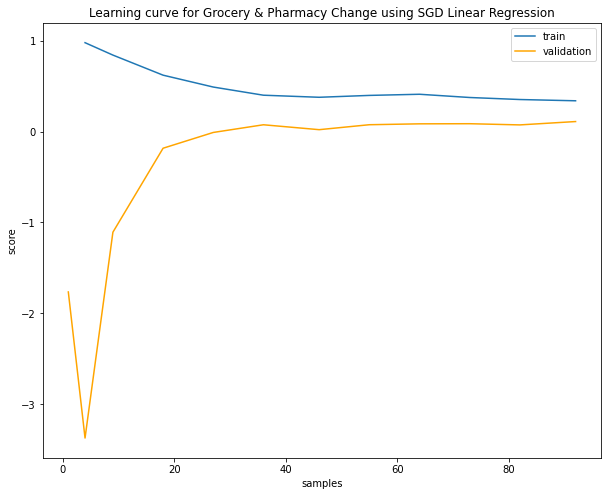

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(sample_sizes, train_scores.mean(axis=1), label='train')
ax.plot(sample_sizes, val_scores.mean(axis=1), color='orange', label='validation')
ax.set(xlabel='samples', ylabel='score', title='Learning curve for Grocery & Pharmacy Change using SGD Linear Regression')
ax.legend()

At a glance, the graph looks similar to that of the Retail and Recreation model. However, the validation score converges to zero. This implies that the model is wholly inaccurate.

### IV. Insights and Evaluation
-------------------------------------------------------------------------------------------------------------------------------
#### High correlation in RnR model:
A high correlation indicates that online searches were high in beginning 2020, drastically dropped in mid 2020 and moderate level in late 2020. This is reasonable due to the Circuit Breaker implementation in mid 2020 where huge restrictions were placed on gatherings, recreational activities and availability of facilities. In this phase, there was a low need to search on recreational activities/venues online. In late 2020 where Phase 2 started and restrictions were loosened, online searches rose with human traffic as such searches are usually stem from strong intents to visit that particular place, providing a stronger correlation between searches and physical visits. In addition, it is highly possible that people are searching about the new regulations implemented and on the limited availability of facilities. With greater uncertainty, people are likely to turn to online searches to find solutions.

#### Low correlation in GnP: 2 possible scenarios
1. <b><u>Unrelated fluctuations:</u></b>
Regardless of COVID-19 impacts, including Circuit Breaker and additional restrictions, groceries and pharmaceutical products are considered to have inelastic demand. Therefore, regardless of the online options that people explored, foot traffic generally stayed stable despite circuit breaker measures, as seen in the visual representation of the Grocery and Pharmacy mobility data. This results in a low correlation between mobility data and query data.

2. <b><u>Consistently low searches:</u></b>
Considering that grocery/pharmacy shopping is a very common (and important) activity, people are more well aware of such news due to repeated emphasis on news/word-of-mouth. Furthermore, restrictions on supermarkets and pharmacies are usually standardised and are more well-spread among the masses. These result in the lower need to search online.
-------------------------------------------------------------------------------------------------------------------------------
#### Conclusion
So, is Internet data, specifically query data, an accurate proxy of actual data in the offline space? We would say it depends.

Our results show that our RnR model is rather accurate with a score of 0.82, indicating that when the data is right, query data can be an excellent stand in for mobility data. However, the GnP model, with a score of 0.28, performed abysmally, indicating that such a method of data collection can also go horribly wrong.

Our conclusion is that there is definitely potential in using Internet data to approximate offline data, but care must be taken to ensure that this method is not used on an unsuitable set of data.

-------------------------------------------------------------------------------------------------------------------------------
#### Future research
Our team expected that results would have a high correlation score, proving that the internet will be an accurate source due to the high dependence and usage of technology in Singapore.

Further research can be conducted on why the Grocery and Pharmacy deviates so much from a perfect correlation. Our team has expected GnP to be very much correlated in the inverse trend due to the mutually exclusive nature of online shopping and physical shopping trips. Increasing popularity and awareness of online shopping, partnered with the reduced willingness to head out due to higher health risks involved, we should expect that online searches move from a low (beg. 2020 - pre-COVID) to a high (mid 2020 - Circuit Breaker) and to a moderate-low level (late 2020 - Phase 2). It should seem fairly reasonable to assume an inverse relation between actual shopping trips and online shopping as they are mutually exclusive. Yet, our data showed otherwise. By delving deeper into this issue, we can understand more about the bigger question of <b>what makes a set of online data a good proxy for physical data</b>.

The scope of this study was also limited by the data that we had. In future studies, the scope could be expanded to include data of other fields (other than shopping) and other types of data (other than query data and mobility data). Our dataset was also rather small (although, as seen from the learning curves, sufficient). If possible, another study with a more robust data set to confirm our findings might be appropriate.